In [1]:
import pandas as pa
import numpy as np
import matplotlib.pylab as py
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
data = pa.read_csv('vessel_point.csv')

In [3]:
data.shape

(27873, 4)

In [4]:
root = 0 #The root is the 26607th data point in the original file (index 26606), but we moved it to the top.
voxel = 0.048504 # A voxel is a cubic pixel 0.048504mm on a side.
n = 27873 # The number of data points

In [5]:
x = np.array(data.iloc[:, 0])
y = np.array(data.iloc[:, 1])
z = np.array(data.iloc[:, 2])
r = np.array(data.iloc[:, 3])

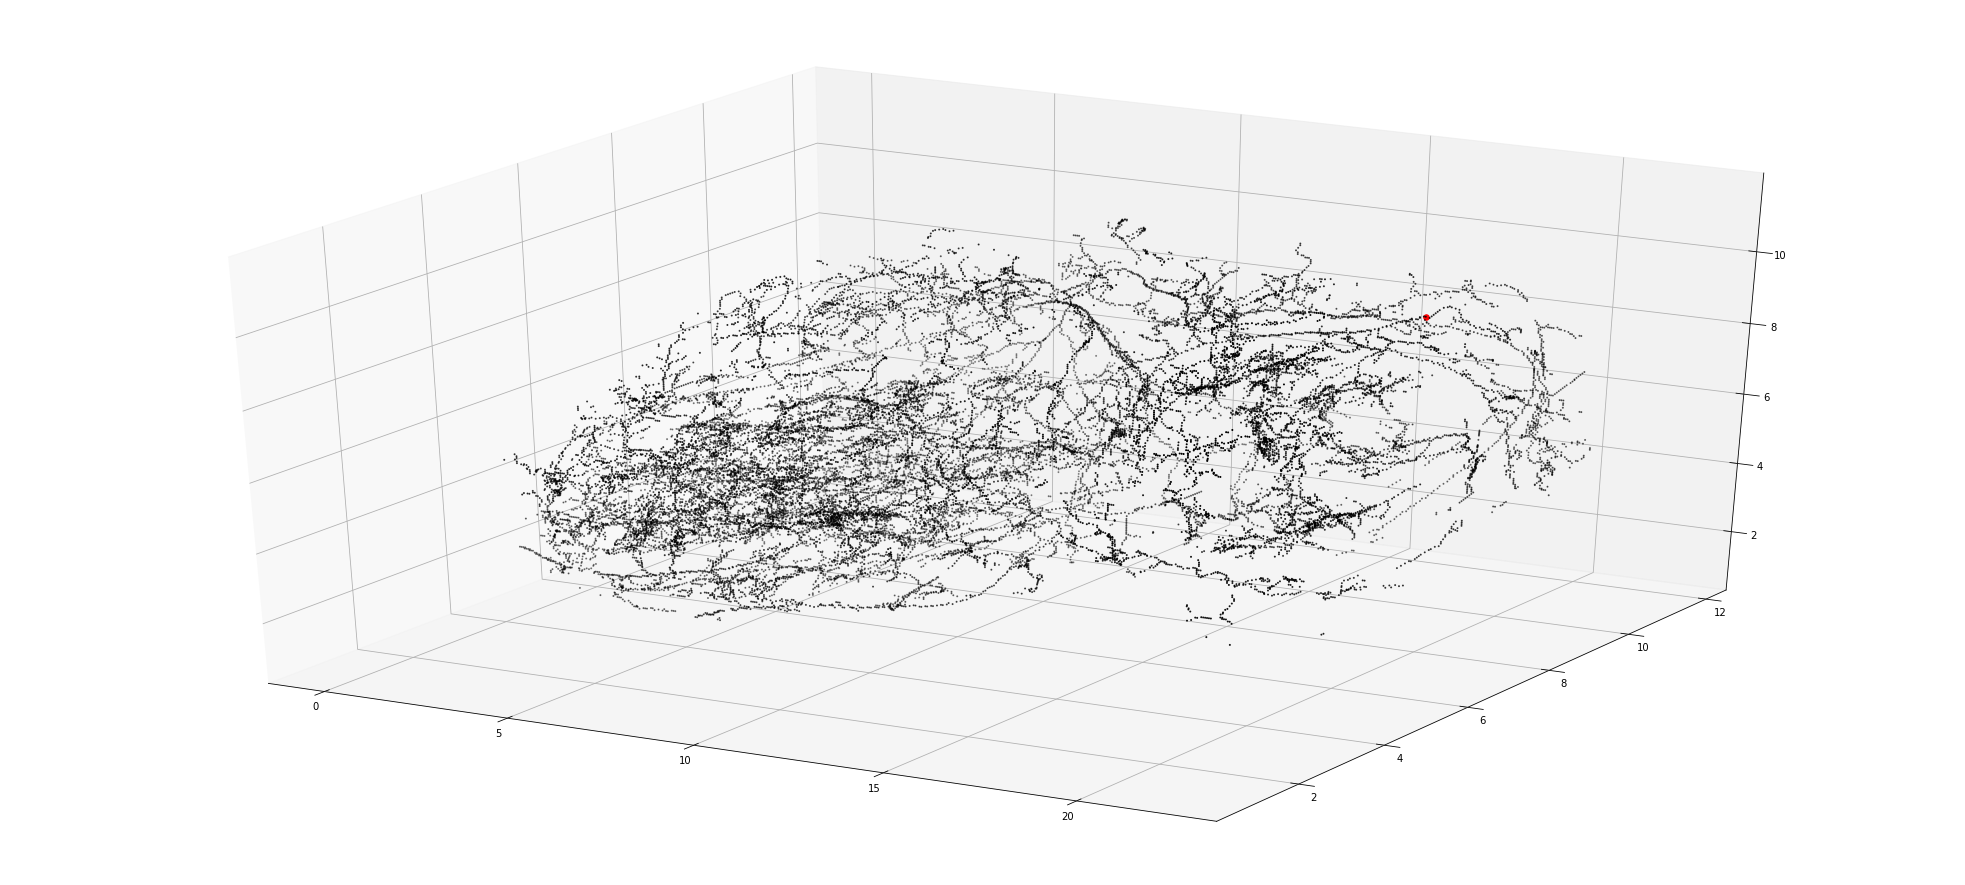

In [17]:
fig = py.figure(1, figsize=(27, 12))
ax = Axes3D(fig)
ax.set_xscale('linear')
ax.set_yscale('linear')
ax.set_zscale('linear')
ax.scatter(z, x, y, s=1, c='black')
ax.scatter(z[0],x[0],y[0],s=30,c='red')
py.show()

In [8]:
# Create the (sparse) adjacency matrix m
# m is a matrix in which every row represents an edge of the graph and is of the form: [i, j, l], where 
# (i, j) \in E and has Eucliean length l = ||(i, j)||.
m=[]
vs = [0] # The vertices adjacent to i are in range(vs[i], vs[i+1]), i.e., vs[i], vs[i]+1, ..., vs[i+1]-1.
for i in range(0, n):
    for j in range(0, n):
        if i != j:
            if abs(x[j]-x[i])<1:
                if abs(y[j]-y[i])<1:
                    if abs(z[j]-z[i])<1:
                        m.append([i, j, np.sqrt(pow(x[i]-x[j],2)+pow(y[i]-y[j],2)+pow(z[i]-z[j],2))])
    vs.append(len(m))


In [11]:
mlen = len(m)
mlen

6371534

In [12]:
# Compute the cable and trench weights of the edges.
cw = []
tw = []
for i in range(0, mlen):
    cw.append(m[i][2]/r[m[i][1]])
    tw.append(m[i][2]*pow(r[m[i][1]],2))

In [15]:
# MPrim: Modified Prim's Algorithm
tau = 100000 # And gamma = 1 by default.
infty = 1000000000 # Infinity, essentially, in this context.
dr = [] # Distance of vertex i to the root
pre = [] # current vertex in the solution tree of lowest cost
cost = [] # cost to add in vertex i
vt = [] # vertices in the solution tree: 0 out 1 in.

# Clear out the vectors.
for i in range(0, n):
    dr.append(infty)
    cost.append(infty)
    pre.append(-1)
    vt.append(0)
vt[0]=1 # The root is in the solution tree.

# Initialize the vectors: Look at everything the root is adjacent to first.
e=0
while m[e][0]==0:
    pre[m[e][1]] = 0
    dr[m[e][1]] = cw[e]
    cost[m[e][1]] = tau*tw[e] + cw[e]
    e = e+1

# This is the key loop of MPrim.    
for i in range(1, n): #range(1, 1000):
    if (i%1000 == 0):
        print(i, " nodes included.")
    # Get minimum cost with index
    k = -1 # Index of the current best vertex.
    # The current minimum cost
    if tau > 1:
        curmin = tau*infty
    else:
        curmin = infty
    for j in range(1, n):
        if not vt[j]:
            if cost[j] < curmin:
                curmin = cost[j]
                k = j
    # Now the best edge is (pre[k], k) with cost cost[k].
    # Insert vertex k and edge (pre[k], k) into the solution tree.
    vt[k] = 1
    
    # Now update the cost and pre vectors.
    for e in range(vs[k], vs[k+1]):
        # if edge (k, ?) is not in the tree
        if (not vt[m[e][1]]):
            j = m[e][1]
            if ((dr[k] + cw[e]) + tau*tw[e]) < cost[j]:
                dr[j] = dr[k] + cw[e]
                cost[j] = dr[j] + tau*tw[e]
                pre[j] = k


1000  nodes included.
2000  nodes included.
3000  nodes included.
4000  nodes included.
5000  nodes included.
6000  nodes included.
7000  nodes included.
8000  nodes included.
9000  nodes included.
10000  nodes included.
11000  nodes included.
12000  nodes included.
13000  nodes included.
14000  nodes included.
15000  nodes included.
16000  nodes included.
17000  nodes included.
18000  nodes included.
19000  nodes included.
20000  nodes included.
21000  nodes included.
22000  nodes included.
23000  nodes included.
24000  nodes included.
25000  nodes included.
26000  nodes included.
27000  nodes included.


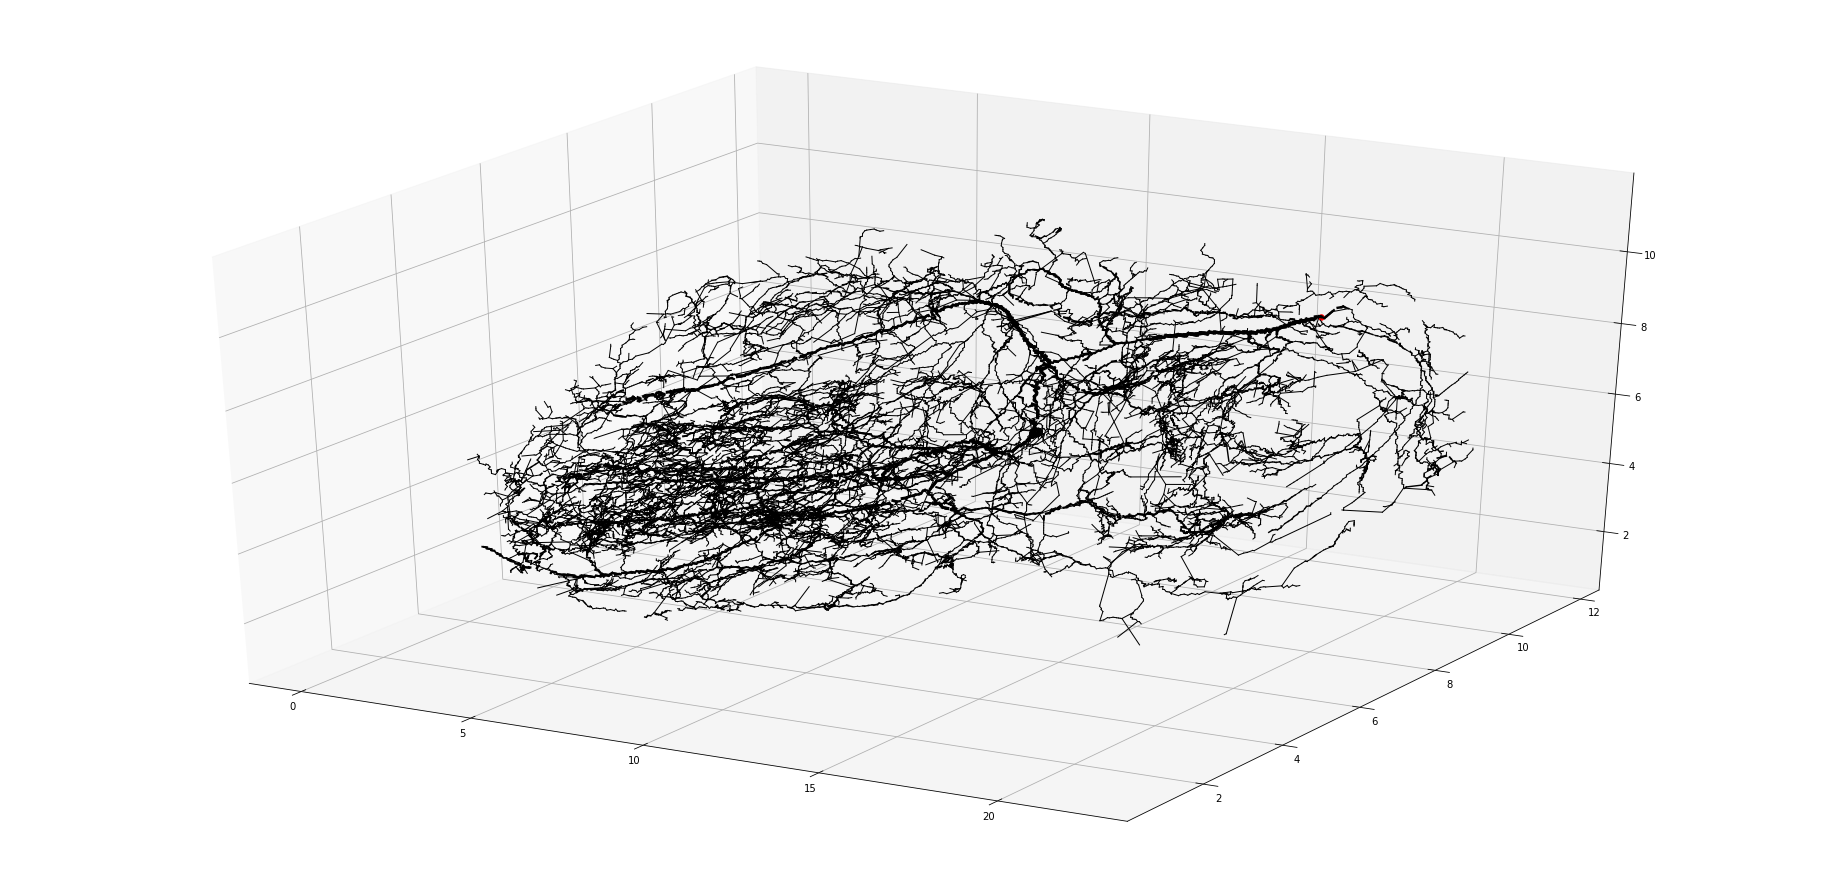

In [16]:
fig = py.figure(1, figsize=(25, 12))
ax = Axes3D(fig)
ax.set_xscale('linear')
ax.set_yscale('linear')
ax.set_zscale('linear')
ax.scatter(z[0],x[0],y[0],s=30,c='red')
for i in range(1, n):
    if(vt[i]):
        ax.plot([z[pre[i]], z[i]], [x[pre[i]],x[i]], zs=[y[pre[i]],y[i]], linewidth=r[i]/voxel, c='black')
py.show()

In [105]:
print(vt)

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 